# (Core) Resampling Datetime Data

For this assignment, you will be working with a modified version of weather data from London from Kaggle. 

The assignment is split into 3 parts:

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data

## Part 1) Load the data and make a datetime index.
- Use the modified version of the data provided here:
    - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    - Raw URL:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv 

You must first load in the data and create a datetime index.

1) Convert the date column to datetime dtype.
2) Set the date column as the index.
3) Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4) Impute any missing values.

Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [1]:
import pandas as pd
import datetime as dt

In [2]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
## displaying random sample
df['date'].sample(n=10).sort_index()

1011     19811008
2564     19860108
4964     19920804
6044     19950720
7082     19980523
9514     20050118
10700    20080418
11599    20101004
14936    20191123
15303    20201124
Name: date, dtype: int64

In [5]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [6]:
df = df.set_index('datetime')

In [7]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                       'max_temp', 'snow_depth']]

In [8]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [11]:
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

In [12]:
# Since our time series is already in daily format, we can use ts.asfreq("D") to set the frequency.
##  set daily frequency
df = df.asfreq('D')
##  preview the index again
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq='D')

In [13]:
df_p = df.resample("M").mean()
df_p.name = 'Resampled'
df_p.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-31,0.461290,5.614516,2.648387,8.482258,0.0
2000-02-29,2.144828,7.181034,3.903448,10.293103,0.0
2000-03-31,0.432258,8.491935,4.891935,12.175806,0.0
2000-04-30,2.393333,8.996667,5.275000,13.161667,0.0
2000-05-31,2.206452,13.798387,9.529032,17.945161,0.0


In [14]:
df_p = df_p.loc['2000':'2010']
df_p = df_p['precipitation']

In [15]:
biggest_precip = df_p.idxmax()
biggest_precip

Timestamp('2009-11-30 00:00:00', freq='M')

In [16]:
df_p.loc[biggest_precip]

4.613333333333333

In [17]:
format_b = "%B %Y"
date_p = biggest_precip.strftime(format_b)
date_p

'November 2009'

In [18]:
highest = round(df_p['2009-11-30'],1)
str(highest)

'4.6'

In [19]:
date =  date_p + "  " + str(highest) + "inches"
date

'November 2009  4.6inches'

In [20]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

The work around in the directions didn't work
Not sure why it goes back before 2000

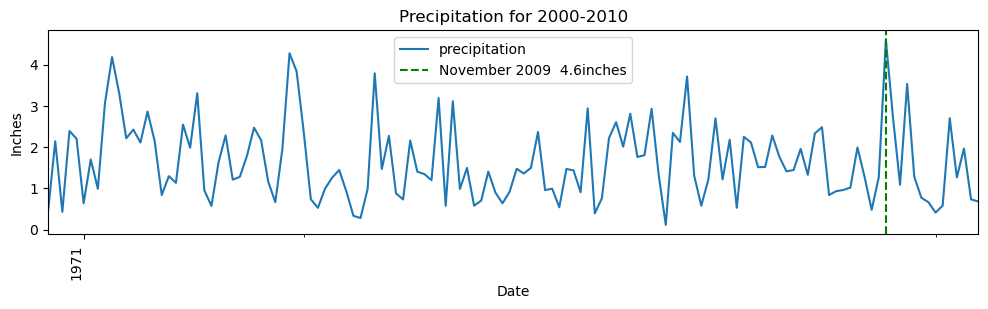

In [21]:
## Plot the data
fig, ax = plt.subplots(figsize=(12,3))
df_p.plot(ax=ax)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel="Date")

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
#minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
#ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
#fig.autofmt_xdate(which='minor',rotation=45)
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(biggest_precip,ls='--',color='green', label=date)

ax.legend()


## Q2: Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.

- Find the date and corresponding value for the max mean temp.

- Plot the feature and time period that corresponds to the question.

    - Make sure to meet the "Visualization Requirements" below!

- Determine the date and value for the lowest mean temp.

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.

- and what was the temperature?

In [22]:
df_temp = df.resample("Y").mean()
df_temp.name = 'Resampled'
df_temp


,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-12-31,1.974863,11.575683,8.001503,15.144672,0.008197
2001-12-31,1.850411,11.331507,7.647397,15.036575,0.000000
2002-12-31,2.060000,12.084247,8.425890,15.815205,0.000000
2003-12-31,1.261096,12.114521,7.895890,16.360274,0.024658
2004-12-31,1.622131,11.900683,8.234563,15.549044,0.005464
2005-12-31,1.155068,11.822877,7.973562,15.676849,0.008219
2006-12-31,1.656986,12.290822,8.506301,16.152055,0.000000
2007-12-31,1.778356,11.944384,8.120137,15.814932,0.016438
2008-12-31,1.698361,11.326776,7.568852,15.156831,0.010929


In [23]:
df_temp = df_temp['mean_temp']

In [24]:
lowest_temp_date = df_temp.idxmin()
lowest_temp_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [34]:
lowest_mean_temp = round(df_temp.loc[lowest_temp_date],1)
lowest_mean_temp
str(lowest_mean_temp)

'10.7'

In [35]:
format_y = "%Y"
date_m = lowest_temp_date.strftime(format_y)
date_m

'2010'

In [37]:
low_date = date_m+"  "+str(lowest_mean_temp)+" degrees"
low_date

'2010  10.7 degrees'

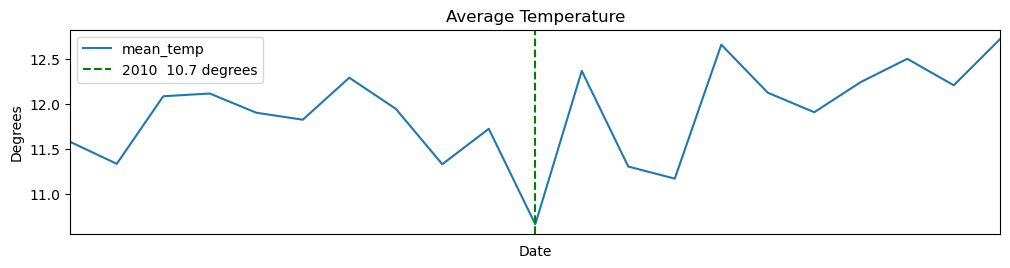

In [39]:
## Plot the data
fig, ax = plt.subplots(figsize=(12,3))
df_temp.plot(ax=ax)
ax.set(title='Average Temperature', ylabel='Degrees', xlabel="Date")

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.YearLocator(1)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
#ax.xaxis.set_minor_formatter(minor_fmt)

## Final xdate tweaks
fig = ax.get_figure()
#fig.autofmt_xdate(which='minor',rotation=45)
fig.autofmt_xdate(which='major',rotation=90)

ax.axvline(lowest_temp_date,ls='--',color='green', label=low_date)

ax.legend()
